# Graded Lab Assignment: Logistic Regression (10 points)

In this assignment you will classify hand-written digits using logistic regression.

The assignment follows Andrew Ng's explanation of Logistic Regression and (re)watching his videos could be useful (Week 3)

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline. 

### Deadline Tuesday, October 10th, 23:59

Do not hand in any other files, the Notebook should contain all your answers.

The points for the assignment are distributed as follows:
* The implementation
    - prediction_function (0.5)
    - cost_function (1)
    - compute_gradient (1)
    - correct double for loop (2)
    - correct stop condition (0.5)
    - preventing overfitting (1)
    - systematically choosing learning rate (1) 
    - best score analysis (1)
    - summary (1)
    - comments (0.5)
    - code (0.5)
    

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Scikit-learn is a toolkit that has several datasets built in. You first need to install the toolkit: http://scikit-learn.org/stable/install.html

The MNIST dataset that you will be using for this assignment contains images of hand-written digits that are only 8 by 8 pixels, which means the algorithm (logistic regression) should run on every computer.

The code in the cell below shows how to work with the digits dataset and  how to visualize it. As you can see the numbers are not very clear in 8x8 pixels images, this means we cannot expect our logistic regression will have a very high classification score.

The numbers shown are: 
 [[0 1 2 3 4]
 [5 6 7 8 9]]


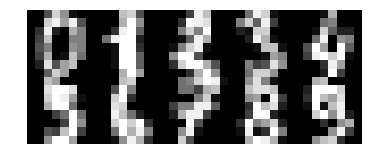

In [2]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=10)

#Create two rows with numbers
firstrow = np.hstack(digits.images[:5,:,:])
secondrow = np.hstack(digits.images[5:10,:,:])

plt.gray()
plt.axis('off')

#Show both rows at the same time
plt.imshow(np.vstack((firstrow,secondrow)))

print("The numbers shown are: \n", np.vstack((digits.target[:5], digits.target[5:10])))

## The implementation

You have to implement the next three functions and fill in the body of the loop in order to create a correct implementation of logistic regression. Don't change the definitions of the functions and input parameters.

(1) Make sure that you do not overfit by keeping track of the score on the test set and implementing a correct stop condition. 
(2) Systematically pick a learning rate alpha that makes sure the algorithm learns in a smooth and stable manner (show how you do it). 
(3) Plot how your score on the test set improves over time. My best score was about 85% correct!
(4) Write a short summary of what you have done (and why) to accomplish steps (1), (2) and (3).
(5) Make sure to comment your code!

In [170]:
#Make a prediction function h
def prediction_function(x,theta):
    xones = np.insert(x, 0, 1, axis=1)
    h = 1 / (1 + exp(- theta@xones.T))
    return h

In [148]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):     
    cost = (-1 / y.size) * (y * log(x_predict) + (1 - y) * log(1 - x_predict)).sum()
    return cost

In [178]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict, y, x):
    xones = np.insert(x, 0, 1, axis=1)
    gradient = 1 / y.size * xones.T@(x_predict - y)
    return gradient

In [195]:
#Choose a suitable learning rate
alpha = 0.01 
iterations = 25
stopcondition = 0.0001
#theta = np.zeros((64,10))
theta = np.zeros(65)
cost = []

#i = 0
#while i < iterations and cost > stopcondition:
#    gradients = compute_gradient(prediction_function(x, theta), y, x)
#    cost = cost_function(prediction_function(x, theta), y)
#    theta = theta - alpha * gradients
#    print(cost)
#    i += 1

print(x[7,:])
    
#It is important to check that you're not overfitting by testing your prediction on a testset
x = np.reshape(digits.images[:1500],(1500,64))
x_test = np.reshape(digits.images[1500:],(297,64))

target = digits.target[:1500]
target_test = digits.target[1500:]

for i in range(iterations):
       for j in range(x.shape[0]):
            x_predict = prediction_function(x[j,:].T, theta)
            y = np.zeros(10)
            y[target[j]] = 1
            
        cost.append(cost_function(x_predict,y))
    
# #In Andrew Ng's presentation he says that y needs to be 1 or 0.
# #You can use the following example code in the inner loop of your implementation
# y = np.zeros(10) #First create a y vector with only zeros
# y[target[j]] = 1 #Then set the right class equal to 1

[  0.   0.   7.   8.  13.  16.  15.   1.   0.   0.   7.   7.   4.  11.  12.
   0.   0.   0.   0.   0.   8.  13.   1.   0.   0.   4.   8.   8.  15.  15.
   6.   0.   0.   2.  11.  15.  15.   4.   0.   0.   0.   0.   0.  16.   5.
   0.   0.   0.   0.   0.   9.  15.   1.   0.   0.   0.   0.   0.  13.   5.
   0.   0.   0.   0.]


IndexError: axis 1 is out of bounds for an array of dimension 1

In [184]:
#prediction_function(x[0,:], array([1.77511774, 0.5365127]))

#x_predict = array([0.1, 0.1, 0.1, 0.1, 0.1])
#y = ones(5)
#x = array([5, 13, 9, 1, 0])
print(compute_gradient(x_predict, y, x))
#xones = numpy.stack((numpy.ones(x.shape[0]).T,x), axis=1)
#xones = np.insert(x, 0, 1, axis=1)
#print(x)
#print(xones.shape)



[ -5.00000000e-01   0.00000000e+00  -1.51333333e-01  -2.61233333e+00
  -5.88966667e+00  -5.95200000e+00  -2.94800000e+00  -7.22000000e-01
  -7.13333333e-02  -3.33333333e-03  -1.01000000e+00  -5.21433333e+00
  -5.92400000e+00  -5.13366667e+00  -4.15566667e+00  -9.46333333e-01
  -5.76666667e-02  -1.66666667e-03  -1.34466667e+00  -4.97200000e+00
  -3.36300000e+00  -3.49533333e+00  -3.88466667e+00  -9.16666667e-01
  -2.76666667e-02  -6.66666667e-04  -1.26066667e+00  -4.52533333e+00
  -4.30833333e+00  -4.97633333e+00  -3.74033333e+00  -1.15000000e+00
  -1.33333333e-03   0.00000000e+00  -1.14800000e+00  -3.76933333e+00
  -4.46366667e+00  -5.12500000e+00  -4.40966667e+00  -1.47566667e+00
   0.00000000e+00  -4.33333333e-03  -7.83666667e-01  -3.40200000e+00
  -3.48000000e+00  -3.72066667e+00  -4.09600000e+00  -1.81233333e+00
  -1.50000000e-02  -4.33333333e-03  -3.63000000e-01  -3.79000000e+00
  -4.68133333e+00  -4.57866667e+00  -4.37566667e+00  -1.94066667e+00
  -1.12666667e-01  -3.33333333e-04

In [176]:
#x_predict = prediction_function(x, array(
#    [0.001, 0.001, 0.001, 0.001,  0.001,
#        0.001, 0.001, 0.001, 0.001,  0.001,
#        0.001, 0.001, 0.001, 0.001,  0.001,
#        0.001, 0.001, 0.001, 0.001,  0.001,
#        0.001, 0.001, 0.001, 0.001,  0.001,
#        0.001, 0.001, 0.001, 0.001,  0.001,
 #       0.001, 0.001, 0.001, 0.001,  0.001,
 #       0.001, 0.001, 0.001, 0.001,  0.001,
 #       0.001, 0.001, 0.001, 0.001,  0.001,
 #       0.001, 0.001, 0.001, 0.001,  0.001,
 ##       0.001, 0.001, 0.001, 0.001,  0.001,
 #       0.001, 0.001, 0.001, 0.001,  0.001,
 #       0.001, 0.001, 0.001, 0.001,  0.001]))
    
x_predict = prediction_function(x, array(
    [0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0,
        0, 0, 0, 0,  0]))
print(x_predict)

[ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]


In [181]:
y = ones(1500)
cost_function(x_predict, ones(1500))


0.69314718055994529